# Data Understanding and Preprocessing

+ Load the dataset and explore the data types, missing values, and basic statistics.
+ Handle missing values, if any, by imputing or removing them.
+ Perform feature engineering, such as creating new features based on the existing ones (e.g., average monthly charge per service).
+ Encode categorical variables using techniques like One-Hot Encoding or Label Encoding.

**Step 1: Data Understanding**

Objective: Understand the structure, size, and type of data to identify potential features and target for the classification model.

Actions:

+ Load the dataset.
+ Inspect the data types, missing values, and unique value counts.
+ Explore basic statistics of each column (mean, median, standard deviation, etc.).

**Step 2: Data Preprocessing**

Objective: Clean the data and prepare it for model training.

Actions:

+ Handle missing values (e.g., impute, remove).
+ Encode categorical variables (e.g., one-hot encoding).
+ Normalize or standardize numerical features.
+ Feature selection or engineering if needed.

In [52]:
## import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  ## for nominal and ordinal encoding
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [53]:
customer_data = pd.read_csv('customer_churn.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Column Explanations:

1. `customerID`: Unique identifier assigned to each customer.
2. `gender`: The gender of the customer (e.g., Male, Female).
3. `SeniorCitizen`: Indicates whether the customer is a senior citizen (1 if Yes, 0 if No).
4. `Partner`: Indicates whether the customer has a partner or not (Yes or No).
5. `Dependents`: Indicates whether the customer has dependents (children or other family members) (Yes or No).
6. `tenure`: The number of months the customer has been with the company.
7. `PhoneService`: Indicates if the customer has a phone service subscription (Yes or No).
8. `MultipleLines`: Indicates if the customer has multiple lines for phone service (Yes, No, or "No phone service").
9. `InternetService`: Indicates the type of internet service the customer has (e.g., DSL, Fiber optic, or No).
10. `OnlineSecurity`: Indicates whether the customer has an online security add-on (Yes, No, or "No internet service").
11. `OnlineBackup`: Indicates whether the customer has an online backup add-on (Yes, No, or "No internet service").
12. `DeviceProtection`: Indicates whether the customer has a device protection plan (Yes, No, or "No internet service").
13. `TechSupport`: Indicates whether the customer has a technical support plan (Yes, No, or "No internet service").
14. `StreamingTV`: Indicates whether the customer has a streaming TV service (Yes, No, or "No internet service").
15. `StreamingMovies`: Indicates whether the customer has a streaming movies service (Yes, No, or "No internet service").
16. `Contract`: The type of contract the customer has (Month-to-month, One year, Two year).
17. `PaperlessBilling`: Indicates if the customer has chosen paperless billing (Yes or No).
18. `PaymentMethod`: The method of payment chosen by the customer (e.g., Electronic check, Mailed check, Bank transfer, Credit card).
19. `MonthlyCharges`: The amount charged to the customer monthly.
20. `TotalCharges`: The total amount charged to the customer over their tenure with the company.
21. `Churn`: The target variable indicating whether the customer has churned (left the company) or not (Yes or No).

In [55]:
## check the data types
customer_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Column Data Types and Explanations:
+ customerID (object): Unique identifier for each customer. No preprocessing needed for modeling but useful for tracking.
+ gender (object): Categorical variable representing the customer's gender. Needs encoding (e.g., Male = 0, Female = 1).
+ SeniorCitizen (int64): Numerical representation (0 = No, 1 = Yes) indicating if the customer is a senior citizen. Already suitable for modeling.
+ Partner (object): Categorical variable indicating if the customer has a partner (Yes/No). Requires encoding.
+ Dependents (object): Categorical variable showing if the customer has dependents (Yes/No). Requires encoding.
+ tenure (int64): Numerical data showing the number of months the customer has been with the company. Ready for use in modeling.
+ PhoneService (object): Categorical variable indicating if the customer has phone service (Yes/No). Needs encoding.
+ MultipleLines (object): Categorical variable (Yes, No, or "No phone service") indicating multiple phone lines. Requires encoding.
+ InternetService (object): Categorical variable representing the type of internet service (DSL, Fiber optic, or No). Needs encoding.
+ OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies (object): Categorical variables indicating whether the customer has these add-ons (Yes, No, or "No internet service"). All require encoding.
+ Contract (object): Categorical variable for contract type (Month-to-month, One year, Two year). Requires encoding.
+ PaperlessBilling (object): Categorical variable indicating if the customer uses paperless billing (Yes/No). Needs encoding.
+ PaymentMethod (object): Categorical variable representing the payment method (e.g., Electronic check, Mailed check). Needs encoding.
+ MonthlyCharges (float64): Numerical variable representing the monthly charges. Suitable for modeling.
+ TotalCharges (object): Potential Issue: Should be numeric but is currently an object type. Needs conversion to a numeric type after handling any non-numeric or missing values.
+ Churn (object): Target variable indicating customer churn (Yes/No). Requires encoding (e.g., No = 0, Yes = 1).

### Handling the Missing Values

In [56]:
# Strip whitespace from all columns in the DataFrame
customer_data = customer_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
## first replace blank values with nan in the dataset
customer_data.replace('', np.nan, inplace=True)
## Check for missing values
missing_values = customer_data.isnull().sum()
## columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
TotalCharges    11
dtype: int64


### Imputing Missing Values

**Mean Imputation**

+ Replace missing values with the mean (average) of the non-missing values in the column.
+ This method is simple and useful when you assume the data is normally distributed.

**Median Imputation**

+ Replace missing values with the median of the non-missing values in the column.
+ This method is robust to outliers and is preferred when the data is skewed.

**Mode Imputation**

+ Replace missing values with the mode (most frequent value) of the column.
+ This method is useful when the data has repeating values or when the column represents categorical data.

**Forward Fill (ffill)**

+ Fill missing values with the previous non-missing value in the column.
+ Useful when you assume that the missing values can be approximated by the preceding values, often used in time-series data.

**Backward Fill (bfill)**

+ Fill missing values with the next non-missing value in the column.
+ Similar to forward fill but uses the subsequent value for imputation.
+ Used in time-series data.

**Interpolation**

+ Interpolate missing values based on the existing values.
+ Linear interpolation is most common, but other methods (e.g., polynomial) can also be used.
+ This method is useful when you want to estimate missing values based on a continuous trend.

**K-Nearest Neighbors (KNN) Imputation**

+ Use machine learning to fill in missing values by finding the most similar rows (nearest neighbors) and using their values for imputation.
+ Requires more computation but can be more accurate in complex datasets.

In [57]:
from sklearn.impute import KNNImputer

original_data = customer_data.copy()

# Step 3: Apply KNN Imputation
customer_data[['TotalCharges']] = imputer.fit_transform(customer_data[['TotalCharges']])

# Step 4: Find the replaced values
# Identify rows where 'TotalCharges' was originally NaN
replaced_values = original_data[original_data['TotalCharges'].isna()]

# Display the replaced values along with their new imputed values
replaced_values = replaced_values.assign(Imputed_Value=customer_data.loc[replaced_values.index, 'TotalCharges'])

print("Replaced Values with their Imputed Values:")
print(replaced_values[['TotalCharges', 'Imputed_Value']])

Replaced Values with their Imputed Values:
     TotalCharges  Imputed_Value
488           NaN    2283.300441
753           NaN    2283.300441
936           NaN    2283.300441
1082          NaN    2283.300441
1340          NaN    2283.300441
3331          NaN    2283.300441
3826          NaN    2283.300441
4380          NaN    2283.300441
5218          NaN    2283.300441
6670          NaN    2283.300441
6754          NaN    2283.300441


In [58]:
missing_values = customer_data.isnull().sum()
## columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [59]:
customer_data.to_csv('no_missing_values_customer_data.csv', index=False)

### Categorical Columns Encoding

**Label Encoding: Assigns a unique integer to each category in a column. For example, "Male" = 0, "Female" = 1.**

+ Use Case: Suitable when the categorical variable has an inherent order (ordinal). For example, "Low", "Medium", "High".
+ Not Ideal: For nominal (unordered) categories, as it introduces an artificial ordinal relationship.


**One-Hot Encoding: Creates a binary column for each category in a feature. For example, if you have a "gender" column with "Male" and "Female", it creates two columns: "gender_Male" and "gender_Female".**

+ Use Case: Recommended for nominal (unordered) categorical variables. It avoids introducing any ordinal relationship and allows models to treat each category independently.
+ Not Ideal: For categorical variables with many unique values, as it can lead to a large number of new columns, causing a "curse of dimensionality."

#### Note

+ **Nominal Data: Categories without order (use One-Hot Encoding).**
+ **Ordinal Data: Categories with a logical order (use Label Encoding).**

+ Ordinal Column (Contract): Use Label Encoding.
+ Binary Nominal Column (SeniorCitizen): No encoding required, as it's already in a numeric format.
+ Other Nominal Columns: Use One-Hot Encoding.

In [60]:
## in this case we are doing the one hot encoding
# List of categorical columns in your dataset
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen'
]

nominal_categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 
    'PaymentMethod'
]

ordinal_categorical_columns = ['Contract']

binary_nominal_columns = ['SeniorCitizen']

target = ['Churn']

# Initialize OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)  # drop='first' to avoid dummy variable trap
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply one-hot encoding and convert to DataFrame
one_hot_encoded = one_hot_encoder.fit_transform(customer_data[nominal_categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(nominal_categorical_columns))

## apply the label encoding to both contract and churn
## churn is the target column
customer_data[['Contract', 'Churn']] = customer_data[['Contract', 'Churn']].apply(label_encoder.fit_transform)

# Step 3: Combine Encoded Features with Original Data
customer_data_encoded = pd.concat([customer_data, one_hot_encoded_df], axis=1)

# Drop the original nominal columns
customer_data_encoded.drop(columns=nominal_categorical_columns, inplace=True)

### Convert Numerical Data to Integers

In [61]:
# Convert 'MonthlyCharges' and 'TotalCharges' to numeric
customer_data_encoded['MonthlyCharges'] = pd.to_numeric(customer_data_encoded['MonthlyCharges'], errors='coerce')
customer_data_encoded['TotalCharges'] = pd.to_numeric(customer_data_encoded['TotalCharges'], errors='coerce')

In [62]:
# Convert specified columns to int32
customer_data_encoded['SeniorCitizen'] = customer_data_encoded['SeniorCitizen'].astype('int32')
customer_data_encoded['Contract'] = customer_data_encoded['Contract'].astype('int32')

In [63]:
customer_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int32  
 2   tenure                                   7043 non-null   int64  
 3   Contract                                 7043 non-null   int32  
 4   MonthlyCharges                           7043 non-null   float64
 5   TotalCharges                             7043 non-null   float64
 6   Churn                                    7043 non-null   int32  
 7   gender_Female                            7043 non-null   float64
 8   gender_Male                              7043 non-null   float64
 9   Partner_No                               7043 non-null   float64
 10  Partner_Yes                              7043 no

### Data Normalization and Standardization

Data Normalization and Standardization are techniques used to scale the data features so that they fall within a specific range or have particular statistical properties. These techniques are crucial in machine learning because they help improve model performance and convergence speed, especially for algorithms that are sensitive to feature scaling, like neural networks or gradient descent-based models.

 1. **Data Normalization** :-- Normalization is the process of scaling individual data points to have a range between 0 and 1 (or sometimes -1 to 1). This method is often useful when you want to bring all features to the same scale, especially when they are on different scales.
 2. **Data Standardization** :-- Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This technique is often used when features have different units or scales but should have equal importance.

**When to Use Normalization vs. Standardization?**

**Normalization** is useful when you want to ensure all features are on the same scale, particularly when using algorithms that do not assume any specific distribution of data, like K-Nearest Neighbors (KNN) or Neural Networks.

**Standardization** is more appropriate when the data follows a Gaussian distribution (bell curve). It's often used in algorithms that assume or are sensitive to normally distributed data, such as linear regression, logistic regression, or Support Vector Machines (SVM).

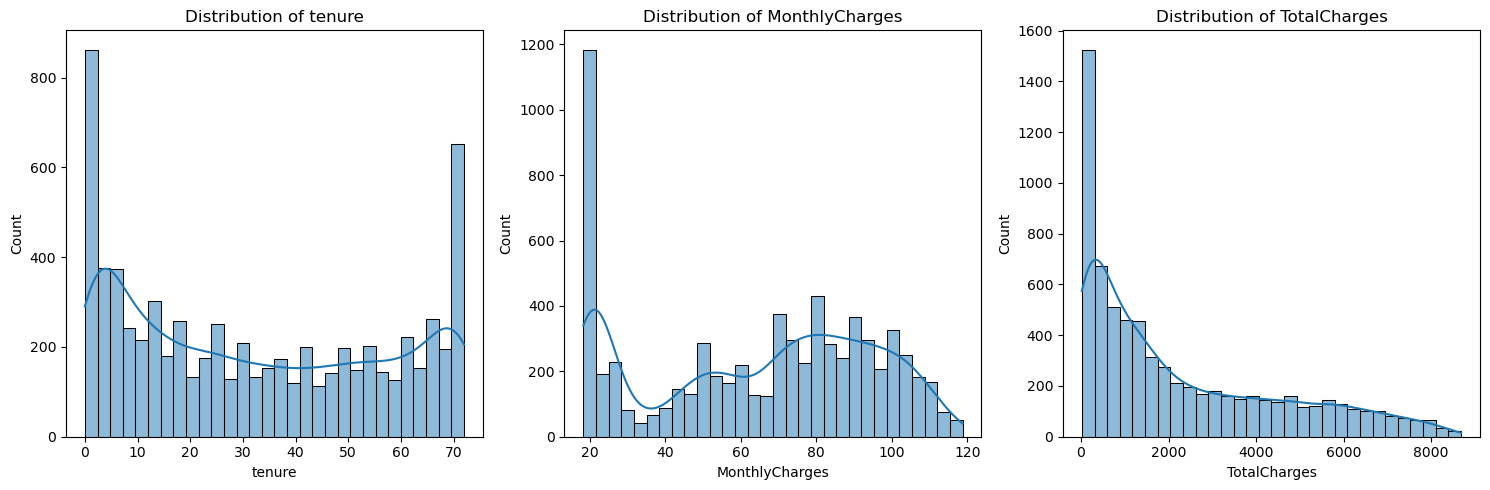

In [64]:
# List of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms for numerical features
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(customer_data_encoded[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

+ Monthly Charges: The distribution is skewed to the right (not normally distributed). There is a significant peak around the lower values (around 20), and the frequency gradually decreases as the charges increase.
+ Total Charges: This distribution is also right-skewed, with a peak near the lower values (close to 0) and a gradual decline towards the higher values.

+ Since both MonthlyCharges and TotalCharges are not normally distributed and appear to be skewed, Normalization (Min-Max Scaling) is more appropriate than Standardization. Normalization will scale the data to a fixed range (typically [0, 1]), preserving the shape of the distribution but bringing all values to a common scale.

In [65]:
# Initialize the scaler
scaler = MinMaxScaler()
# Apply normalization to 'MonthlyCharges' and 'TotalCharges'
customer_data_encoded[['MonthlyCharges', 'TotalCharges','tenure']] = scaler.fit_transform(customer_data_encoded[['MonthlyCharges', 'TotalCharges','tenure']])

In [66]:
customer_data_encoded.head()

,customerID,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0.013889,0,0.115423,0.001275,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,0,0.472222,1,0.385075,0.215867,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,0,0.027778,0,0.354229,0.010310,1,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,0,0.625000,1,0.239303,0.210241,0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,0,0.027778,0,0.521891,0.015330,1,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [67]:
# Check for missing values
missing_values = pd.DataFrame(customer_data_encoded).isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [68]:
## save the dataset
customer_data_encoded.to_csv('processed_customer_data.csv', index=False)